In [1]:
import sys
import os
sys.path.insert(0, os.path.abspath('../'))
sys.path.insert(0, os.path.abspath('../../'))
sys.path.insert(0, os.path.abspath('/home/hm-tlacherm/qlm_notebooks/notebooks_1.2.1/notebooks/master_thesis_qaoa/'))
sys.path.insert(0, os.path.abspath('/home/hm-tlacherm/qlm_notebooks/notebooks_1.2.1/notebooks/master_thesis_qaoa/ibm/'))

In [2]:
import numpy as np

import qiskit
provider = qiskit.IBMQ.load_account()
from qiskit import Aer
from qiskit.utils import QuantumInstance
from qiskit_optimization.algorithms import MinimumEigenOptimizer
from qiskit.algorithms import QAOA
from shared.QiskitMaxcut import *
from ibm.ibm_parameters import *

from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
import networkx as nx
import numpy as np

def generate_butterfly_graph(with_weights=True):
    # Generate a graph of 5 nodes
    n = 5
    graph = nx.Graph()
    graph.add_nodes_from(np.arange(0, n, 1))
    if with_weights:
        elist = [(0, 1, 9), (0, 2, 6), (1, 2, 9), (2, 3, 10), (2, 4, 7), (3, 4, 7)]
    else:
        elist = [(0, 1, 1), (0, 2, 1), (1, 2, 1), (2, 3, 1), (2, 4, 1), (3, 4, 1)]
    graph.add_weighted_edges_from(elist)
    return graph

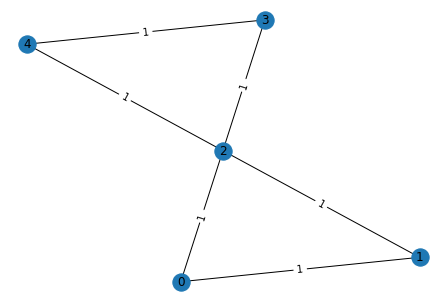

In [4]:
graph = generate_butterfly_graph(with_weights=False)
max_cut = Maxcut(graph)
max_cut_qubo = max_cut.to_qubo()
print(graph.name)
max_cut.draw()

In [28]:
step_size = 0.1
gamma_range = np.arange(0, np.pi, step_size)
beta_range = np.arange(0, np.pi, step_size)

In [29]:
# xx, yy = np.meshgrid(xvalues, yvalues)
g_gamma, b_beta = np.meshgrid(gamma_range, beta_range)

In [30]:
len(gamma_range)

32

In [31]:
DEFAULT_QASM_SIMULATOR

'qasm_simulator'

In [32]:
from qiskit.algorithms.minimum_eigen_solvers.qaoa import QAOA
quantum_instance = QuantumInstance(
                    backend=Aer.get_backend(DEFAULT_QASM_SIMULATOR),
                    shots=SHOTS)
qaoa = QAOA(
            optimizer=COBYLA(maxiter=0),
            quantum_instance=quantum_instance,
            reps=1,
            initial_point=[1.,0]
            )

op, offset = max_cut_qubo.to_ising()
from qiskit_optimization.algorithms.minimum_eigen_optimizer import (
    MinimumEigenOptimizer,
    MinimumEigenOptimizationResult,
)
MinimumEigenOptimizer(qaoa).solve(max_cut_qubo)
qaoa.ansatz.draw()

┌───┐┌───┐┌──────────────┐┌───┐┌───┐┌──────────────┐┌───┐┌──────────────┐»
q_0: ┤ H ├┤ X ├┤ Rz(1.0*t[0]) ├┤ X ├┤ X ├┤ Rz(1.0*t[0]) ├┤ X ├┤ Rx(2.0*t[1]) ├»
     ├───┤└─┬─┘└──────────────┘└─┬─┘└─┬─┘└──────────────┘└─┬─┘└────┬───┬─────┘»
q_1: ┤ H ├──■────────────────────■────┼────────────────────┼───────┤ X ├──────»
     ├───┤                            │                    │       └─┬─┘      »
q_2: ┤ H ├────────────────────────────■────────────────────■─────────■────────»
     ├───┤                                                                    »
q_3: ┤ H ├────────────────────────────────────────────────────────────────────»
     ├───┤                                                                    »
q_4: ┤ H ├────────────────────────────────────────────────────────────────────»
     └───┘                                                                    »
«                                                                    »
«q_0: ───────────────────────────────────────────────────────────────»
«     ┌──────────────┐┌───┐┌──────────────┐                          »
«q_1: ┤ Rz(1.0*t[0]) ├┤ X ├┤ Rx(2.0*t[1]) ├──────────────────────────»
«     └──────────────┘└─┬─┘└────┬───┬─────┘┌──────────────┐┌───┐┌───┐»
«q_2: ──────────────────■───────┤ X ├──────┤ Rz(1.0*t[0]) ├┤ X ├┤ X ├»
«                               └─┬─┘      └──────────────┘└─┬─┘└─┬─┘»
«q_3: ────────────────────────────■──────────────────────────■────┼──»
«                                                                 │  »
«q_4: ────────────────────────────────────────────────────────────■──»
«                                                                    »
«                                                               »
«q_0: ──────────────────────────────────────────────────────────»
«                                                               »
«q_1: ──────────────────────────────────────────────────────────»
«     ┌──────────────┐┌───┐┌──────────────┐                     »
«q_2: ┤ Rz(1.0*t[0]) ├┤ X ├┤ Rx(2.0*t[1]) ├─────────────────────»
«     └──────────────┘└─┬─┘└────┬───┬─────┘┌──────────────┐┌───┐»
«q_3: ──────────────────┼───────┤ X ├──────┤ Rz(1.0*t[0]) ├┤ X ├»
«                       │       └─┬─┘      └──────────────┘└─┬─┘»
«q_4: ──────────────────■─────────■──────────────────────────■──»
«                                                               »
«                     
«q_0: ────────────────
«                     
«q_1: ────────────────
«                     
«q_2: ────────────────
«     ┌──────────────┐
«q_3: ┤ Rx(2.0*t[1]) ├
«     ├──────────────┤
«q_4: ┤ Rx(2.0*t[1]) ├
«     └──────────────┘

In [33]:
qaoa._check_operator_ansatz(op)
initial_point = qiskit.algorithms.minimum_eigen_solvers.vqe._validate_initial_point(qaoa._initial_point, qaoa.ansatz)
bounds = qiskit.algorithms.minimum_eigen_solvers.vqe._validate_bounds(qaoa.ansatz)
        
# construct circuit 
#print(qaoa.ansatz)
print(qaoa.ansatz)
param_dict = dict(zip(qaoa._ansatz_params, initial_point))  # type: Dict
circuit = qaoa.ansatz.assign_parameters(param_dict)
_=circuit.draw('mpl')

     ┌───┐┌───┐┌──────────────┐┌───┐┌───┐┌──────────────┐┌───┐┌──────────────┐»
q_0: ┤ H ├┤ X ├┤ Rz(1.0*t[0]) ├┤ X ├┤ X ├┤ Rz(1.0*t[0]) ├┤ X ├┤ Rx(2.0*t[1]) ├»
     ├───┤└─┬─┘└──────────────┘└─┬─┘└─┬─┘└──────────────┘└─┬─┘└────┬───┬─────┘»
q_1: ┤ H ├──■────────────────────■────┼────────────────────┼───────┤ X ├──────»
     ├───┤                            │                    │       └─┬─┘      »
q_2: ┤ H ├────────────────────────────■────────────────────■─────────■────────»
     ├───┤                                                                    »
q_3: ┤ H ├────────────────────────────────────────────────────────────────────»
     ├───┤                                                                    »
q_4: ┤ H ├────────────────────────────────────────────────────────────────────»
     └───┘                                                                    »
«                                                                    »
«q_0: ───────────────────────────────────────────

In [34]:
def maxcut_obj(x, G):
    """
    Given a bitstring as a solution, this function returns
    the number of edges shared between the two partitions
    of the graph.
    
    Args:
        x: str
           solution bitstring
           
        G: networkx graph
        
    Returns:
        obj: float
             Objective
    """
    obj = 0
    for i,j,w in graph.edges.data('weight'):
        if x[i] != x[j]:
            obj -= w
            
    return obj


def compute_expectation(counts, G):
    
    """
    Computes expectation value based on measurement results
    
    Args:
        counts: dict
                key as bitstring, val as count
           
        G: networkx graph
        
    Returns:
        avg: float
             expectation value
    """
    
    avg = 0
    sum_count = 0
    for bitstring, count in counts.items():
        
        obj = maxcut_obj(bitstring, G)
        avg += obj * count
        sum_count += count
        
    return avg/sum_count

In [35]:
def create_cirucit(beta,gamma):
    circuits = qaoa.construct_circuit([gamma,beta], operator=op)
    circuit = circuits[0]
    circuit.measure_all()
    return circuit

In [36]:
landscape = np.zeros(b_beta.shape)

for i in range(0, len(landscape)):
    circuits = []
    for j in range(0, len(landscape)):
        # create circuits for entire row 
        circuit = create_cirucit(b_beta[i][j], g_gamma[i][j])
        circuits.append(circuit)
    
    # create one job with circuits 
    job_name = f"{graph.name}_row_{i}"
    job = qiskit.execute(circuits, backend=Aer.get_backend('qasm_simulator'), shots=1024)
    #job.update_name(job_name)
    #print(job_name)
    print(".", end="")
    
    # add results to landscape 
    j = 0
    for count in job.result().get_counts():
        mean = compute_expectation(count, graph)
        landscape[i,j] = mean
        j += 1


................................

In [37]:
c = create_cirucit(5.,1.0)
_=c.draw('mpl')

[[-2.99609375 -2.99804688 -3.00390625 ... -3.00390625 -3.00585938
  -2.9921875 ]
 [-3.078125   -2.79101562 -2.73242188 ... -3.31054688 -3.1171875
  -3.0234375 ]
 [-3.00585938 -2.77929688 -2.58007812 ... -3.48046875 -3.2734375
  -3.08203125]
 ...
 [-3.00390625 -3.26953125 -3.44726562 ... -2.38085938 -2.57617188
  -2.89648438]
 [-2.96875    -3.13671875 -3.30664062 ... -2.671875   -2.69921875
  -2.91015625]
 [-2.98046875 -3.0234375  -3.05273438 ... -2.90429688 -2.96875
  -3.01171875]]


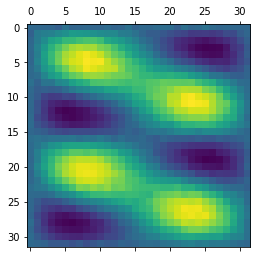

In [38]:
print(landscape)
plt.matshow(landscape)
plt.show()

In [39]:
# Mean of landscape
np.mean(landscape)

-2.638124465942383

In [40]:
# Minimium 
np.min(landscape)

-3.943359375

In [41]:
# Display Coordinates of Minimum 
np.unravel_index(np.argmin(landscape), landscape.shape)

(19, 25)

In [42]:
# Gamma and beta value of Minimium
beta, gamma = np.unravel_index(np.argmin(landscape), landscape.shape)
opt_gamma = gamma_range[gamma]
opt_beta = beta_range[beta]
print(f"Opt.Gamma: {opt_gamma}, Opt.Beta: {opt_beta}")

Opt.Gamma: 2.5, Opt.Beta: 1.9000000000000001


In [43]:
# Save result matrix 
with open('landscape_final_butterfly_no_weights_results.npy', 'wb') as f:
    np.save(f, landscape)

In [44]:
#with open('landscape_final_butterfly_no_weights_results.npy', 'rb') as f:
#landscape = np.load('landscape_final_butterfly_no_weights_results.npy', allow_pickle=True)

In [45]:
import plotly.graph_objects as go

In [47]:
# Plot landscape in 3D 

fig = go.Figure(data=go.Surface(z=landscape, x=gamma_range, y=beta_range))

fig.update_traces(contours_z=dict(show=True, usecolormap=True, highlightcolor='limegreen', project_z=True))


fig.update_layout(title="QAOA on Simulator - MaxCut-Landscape", scene=dict(
    xaxis_title="γ",
    yaxis_title="β",
    zaxis_title="F(γ,β)"
))

In [25]:
# Plot Heatmap 
fig = go.Figure(data=go.Heatmap(z=landscape, y=beta_range, x=gamma_range, type = 'heatmap', colorscale = 'viridis'))

# Update Layout
fig.update_layout(title="F(γ,β)", width=700, height=700, yaxis_title="β", xaxis_title="γ")

# Display Global Minimium 
fig.add_trace(
    go.Scatter(mode="markers", y=[0.3], x=[2.53], name ="", marker_symbol=[204], text = [landscape[beta, gamma]],
                   marker_color="red",  hovertemplate="gamma: %{x}<br>beta: %{y}<br> mean: %{text:.2f}<extra></extra>", 
                   marker_line_width=0.5, marker_size=12))

# Display Global Minimium 
fig.add_trace(
    go.Scatter(mode="markers", y=[1.26], x=[1.26], name="", marker_symbol=[204], text = [landscape[beta, gamma]],
                   marker_color="orange",  hovertemplate="gamma: %{x}<br>beta: %{y}<br> mean: %{text:.2f}<extra></extra>", 
                   marker_line_width=0.5, marker_size=12))

[[-2.99609375 -2.99804688 -3.00390625 ... -3.00390625 -3.00585938
  -2.9921875 ]
 [-3.078125   -2.79101562 -2.73242188 ... -3.31054688 -3.1171875
  -3.0234375 ]
 [-3.00585938 -2.77929688 -2.58007812 ... -3.48046875 -3.2734375
  -3.08203125]
 ...
 [-3.00390625 -3.26953125 -3.44726562 ... -2.38085938 -2.57617188
  -2.89648438]
 [-2.96875    -3.13671875 -3.30664062 ... -2.671875   -2.69921875
  -2.91015625]
 [-2.98046875 -3.0234375  -3.05273438 ... -2.90429688 -2.96875
  -3.01171875]]


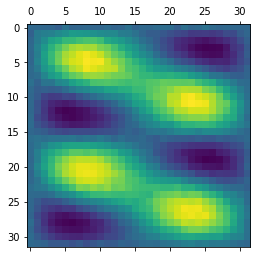

In [247]:
print(landscape)
plt.matshow(landscape)
plt.show()

In [337]:
#noise_landscape = np.load('landscape_mumbai_butterfly_no_weights_results.npy')
em_landscape = np.load('/home/hm-tlacherm/qlm_notebooks/notebooks_1.2.1/notebooks/measurements/noise_model_gem/master_thesis_qaoa/ibm/measurements/landscape_toronto_noise_model_butterfly_no_weights_em_results.npy')

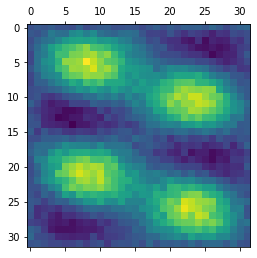

In [338]:
plt.matshow(em_landscape)
plt.show()

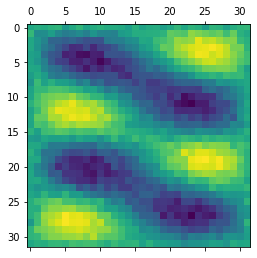

In [339]:
#diff_landscape = np.abs(em_landscape - landscape) # np.abs(landscape - noise_landscape)
diff_em_landscape = em_landscape - landscape # np.abs(landscape - noise_landscape)
plt.matshow(diff_em_landscape)
plt.show()

In [321]:
#noise_landscape = np.load('landscape_mumbai_butterfly_no_weights_results.npy')
noise_landscape = np.load('/home/hm-tlacherm/qlm_notebooks/notebooks_1.2.1/notebooks/measurements/noise_model_gem/master_thesis_qaoa/ibm/measurements/landscape_toronto_noise_model_butterfly_no_weights_results.npy')


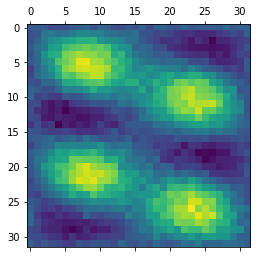

In [322]:
 # np.abs(landscape - noise_landscape)
plt.matshow(noise_landscape)
plt.show()

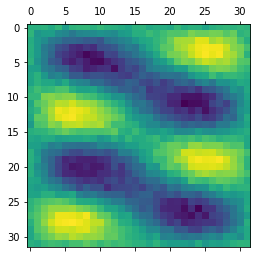

In [323]:
#diff_landscape = np.abs(noise_landscape - landscape) # np.abs(landscape - noise_landscape)
diff_landscape = noise_landscape - landscape # np.abs(landscape - noise_landscape)
plt.matshow(diff_landscape)
plt.show()

In [324]:
# Plot landscape in 3D 

fig = go.Figure(data=go.Surface(z=diff_landscape, x=gamma_range, y=beta_range))

fig.update_traces(contours_z=dict(show=True, usecolormap=True, highlightcolor='limegreen', project_z=True))


fig.update_layout(title="QAOA MaxCut-Landscape: Diff Simulator - IBM Sydney", scene=dict(
    xaxis_title="γ",
    yaxis_title="β",
    zaxis_title="F(γ,β)"
))

<a list of 27 text.Text objects>

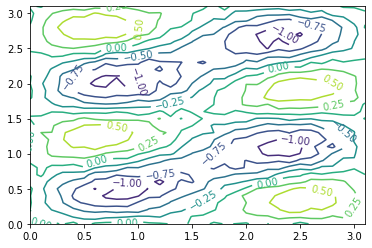

In [325]:
fig, ax = plt.subplots()
CS = ax.contour(gamma_range, beta_range, diff_landscape)
ax.clabel(CS, inline=True, fontsize=10)

In [326]:
gem_landscape = np.load('/home/hm-tlacherm/qlm_notebooks/notebooks_1.2.1/notebooks/measurements/noise_model_gem/master_thesis_qaoa/ibm/measurements/landscape_toronto_noise_model_butterfly_no_weights_gem_results.npy')

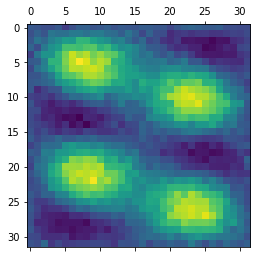

In [327]:
plt.matshow(gem_landscape)
plt.show()

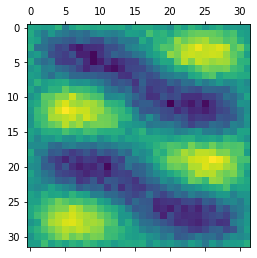

In [328]:
#diff_gem_landscape = np.abs(gem_landscape - landscape)#landscape - gem_landscape # np.abs(landscape - gem_landscape)
diff_gem_landscape = gem_landscape - landscape # np.abs(landscape - gem_landscape)
plt.matshow(diff_gem_landscape)
plt.show()

In [329]:
# Plot landscape in 3D 

fig = go.Figure(data=go.Surface(z=diff_gem_landscape, x=gamma_range, y=beta_range))

fig.update_traces(contours_z=dict(show=True, usecolormap=True, highlightcolor='limegreen', project_z=True))


fig.update_layout(title="QAOA MaxCut-Landscape: Abs Diff Simulator - GEM", scene=dict(
    xaxis_title="γ",
    yaxis_title="β",
    zaxis_title="F(γ,β)"
))

#fig.add_trace(
#    go.Surface(z=landscape, x=gamma_range, y=beta_range, colorscale = 'viridis'))

Text(0.5, 1.0, 'QC mit GEM - Simulation')

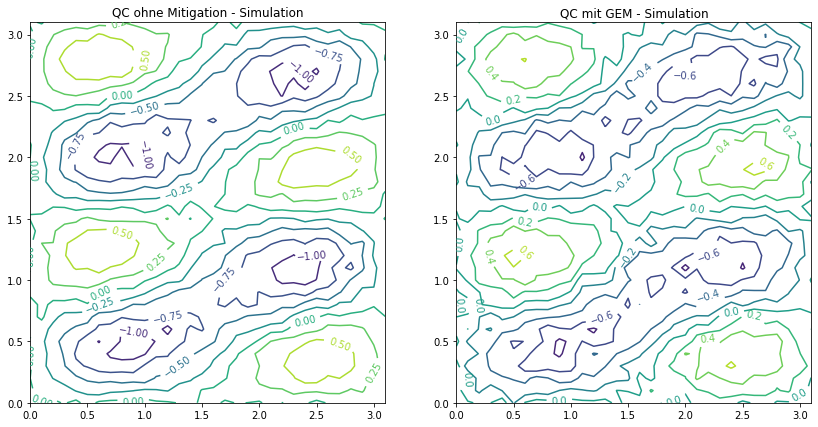

In [330]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(14, 7)
# noise
CS = ax[0].contour(gamma_range, beta_range, diff_landscape)
ax[0].clabel(CS, inline=True, fontsize=10)
ax[0].set_title('QC ohne Mitigation - Simulation')

# gem 
CS = ax[1].contour(gamma_range, beta_range, diff_gem_landscape)
ax[1].clabel(CS, inline=True, fontsize=10)
ax[1].set_title('QC mit GEM - Simulation')


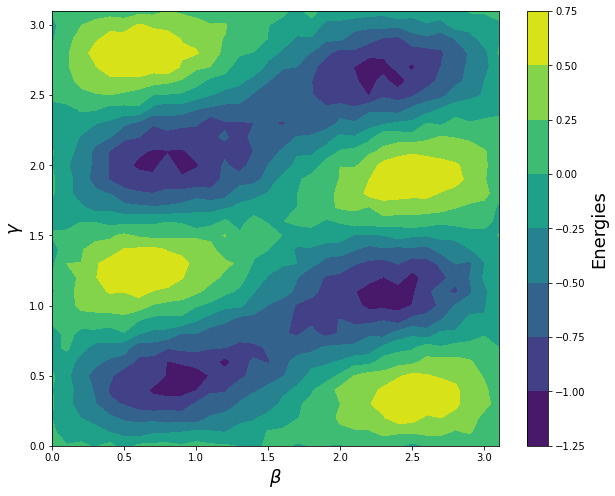

In [331]:
fig, ax1 = plt.subplots(figsize = (10, 8))

cm = plt.cm.get_cmap()
plot = ax1.contourf(gamma_range, beta_range, diff_landscape, cmap = cm)


ax1.set_xlabel(r'$\beta$', fontsize = 18)
ax1.set_ylabel(r'$\gamma$', fontsize = 18)

colorbar = plt.colorbar(plot)

colorbar.ax.set_ylabel('Energies', fontsize = 18)

plt.show()

Text(0.5, 1.0, 'QC mit GEM - Simulation')

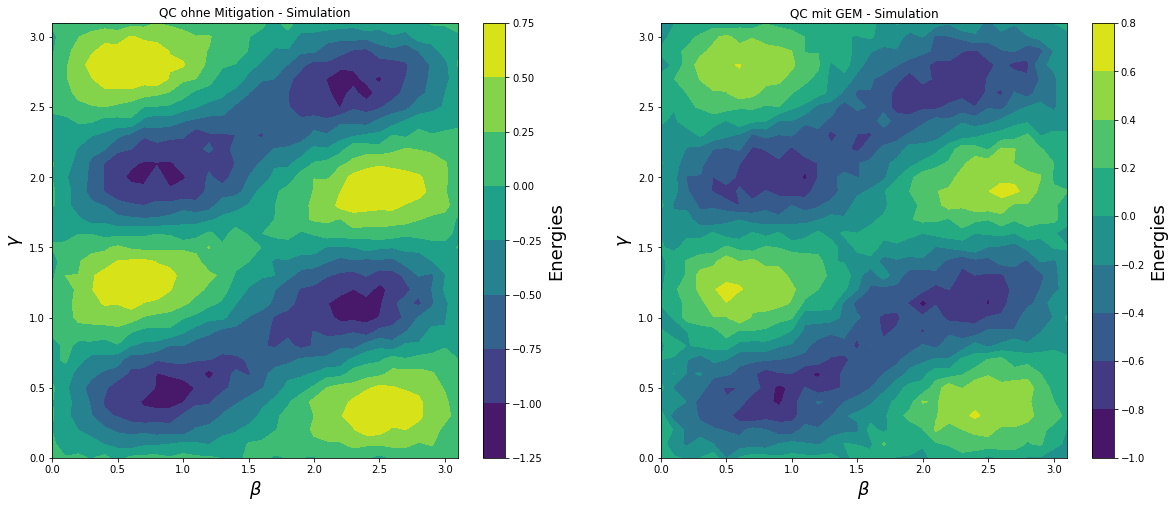

In [332]:
fig, ax = plt.subplots(1,2, figsize=(20,8))
#fig.set_size_inches(10, 8)
# noise
cm = plt.cm.get_cmap()
plot = ax[0].contourf(gamma_range, beta_range, diff_landscape, cmap = cm)
ax[0].set_xlabel(r'$\beta$', fontsize = 18)
ax[0].set_ylabel(r'$\gamma$', fontsize = 18)
colorbar = plt.colorbar(plot, ax=ax[0])
colorbar.ax.set_ylabel('Energies', fontsize = 18)
ax[0].set_title('QC ohne Mitigation - Simulation')

# gem 
plot = ax[1].contourf(gamma_range, beta_range, diff_gem_landscape, cmap = cm)
ax[1].set_xlabel(r'$\beta$', fontsize = 18)
ax[1].set_ylabel(r'$\gamma$', fontsize = 18)
#colorbar = plt.colorbar(plot)
colorbar = plt.colorbar(plot, ax=ax[1])
colorbar.ax.set_ylabel('Energies', fontsize = 18)

ax[1].set_title('QC mit GEM - Simulation')


Text(0.5, 1.0, 'QC mit GEM - Simulation')

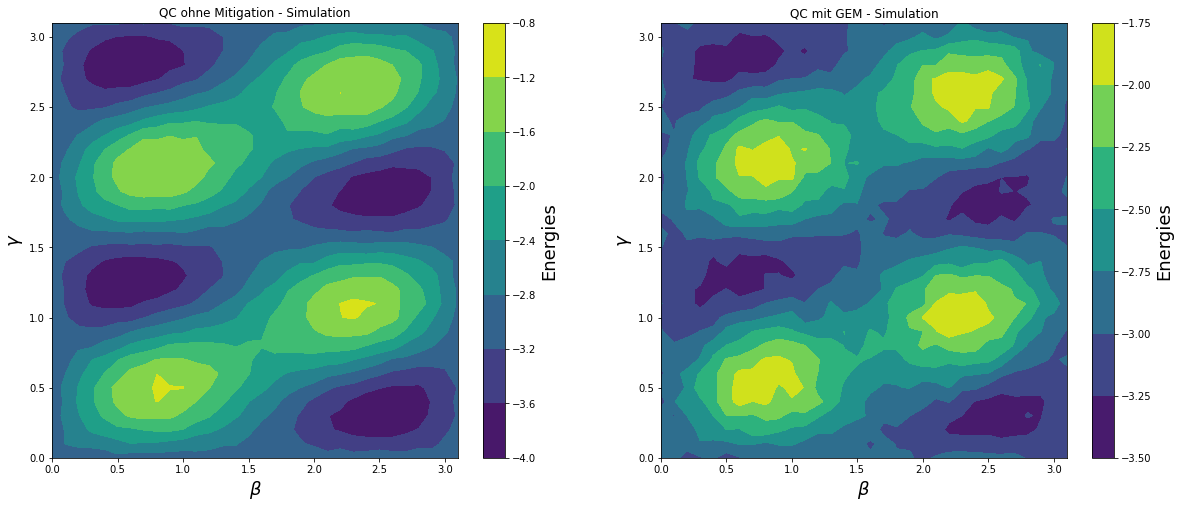

In [333]:
fig, ax = plt.subplots(1,2, figsize=(20,8))
#fig.set_size_inches(10, 8)
# noise
cm = plt.cm.get_cmap()
plot = ax[0].contourf(gamma_range, beta_range, landscape, cmap = cm)
ax[0].set_xlabel(r'$\beta$', fontsize = 18)
ax[0].set_ylabel(r'$\gamma$', fontsize = 18)
colorbar = plt.colorbar(plot, ax=ax[0])
colorbar.ax.set_ylabel('Energies', fontsize = 18)
ax[0].set_title('QC ohne Mitigation - Simulation')

# gem 
plot = ax[1].contourf(gamma_range, beta_range, gem_landscape, cmap = cm)
ax[1].set_xlabel(r'$\beta$', fontsize = 18)
ax[1].set_ylabel(r'$\gamma$', fontsize = 18)
#colorbar = plt.colorbar(plot)
colorbar = plt.colorbar(plot, ax=ax[1])
colorbar.ax.set_ylabel('Energies', fontsize = 18)

ax[1].set_title('QC mit GEM - Simulation')


Text(0.5, 1.0, 'Noise mit EM')

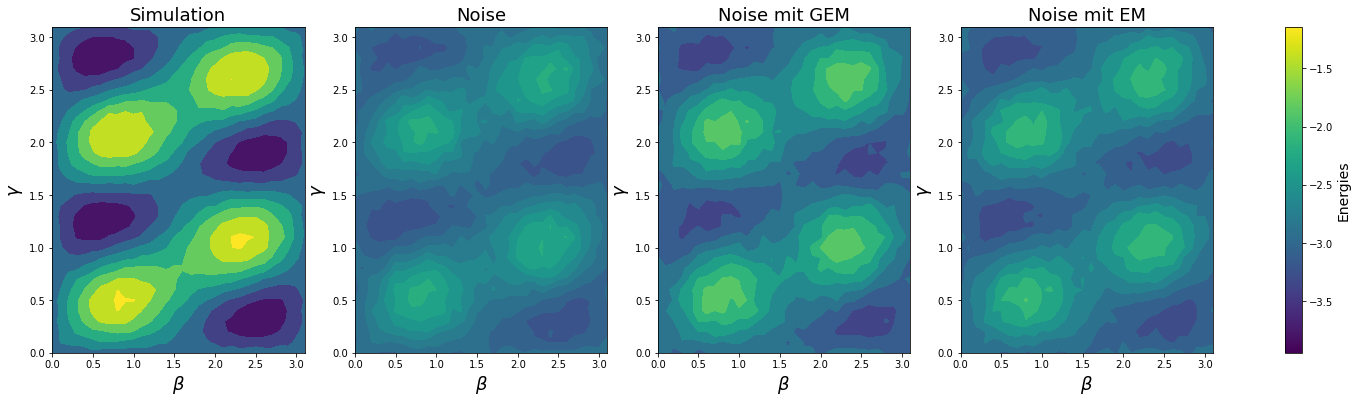

In [346]:
from matplotlib.colors import Normalize
import matplotlib.cm as cm
import numpy as np
from matplotlib.colors import Normalize
import matplotlib.pyplot as plt
import matplotlib.cm as cm

fig, ax = plt.subplots(1,4, figsize=(26,6))
#fig.set_size_inches(10, 8)
# simulation
cmap = cm.get_cmap('viridis')
#normalizer=Normalize(0,4)
#im=cm.ScalarMappable(norm=normalizer)
minv = np.min([landscape, noise_landscape, gem_landscape])
maxv = np.max([landscape, noise_landscape, gem_landscape])
normalizer=Normalize(minv,maxv)
im=cm.ScalarMappable(norm=normalizer)

plot = ax[0].contourf(gamma_range, beta_range, landscape, cmap = cmap, norm=normalizer)
ax[0].set_xlabel(r'$\beta$', fontsize = 18)
ax[0].set_ylabel(r'$\gamma$', fontsize = 18)
#colorbar = plt.colorbar(im, ax=ax[0])
#colorbar.ax.set_ylabel('Energies', fontsize = 14)
ax[0].set_title('Simulation', fontsize = 18)

# noise 
plot = ax[1].contourf(gamma_range, beta_range, noise_landscape, cmap = cmap, norm=normalizer)
ax[1].set_xlabel(r'$\beta$', fontsize = 18)
ax[1].set_ylabel(r'$\gamma$', fontsize = 18)

#colorbar = plt.colorbar(im, ax=ax[1])
#colorbar.ax.set_ylabel('Energies', fontsize = 14)
ax[1].set_title('Noise', fontsize = 18)

# gem 
plot = ax[2].contourf(gamma_range, beta_range, gem_landscape, cmap = cmap, norm=normalizer)
ax[2].set_xlabel(r'$\beta$', fontsize = 18)
ax[2].set_ylabel(r'$\gamma$', fontsize = 18)
#colorbar = plt.colorbar(plot)
#colorbar = plt.colorbar(im, ax=ax[2])
#colorbar.ax.set_ylabel('Energies', fontsize = 14)

ax[2].set_title('Noise mit GEM', fontsize = 18)

# em
plot = ax[3].contourf(gamma_range, beta_range, em_landscape, cmap = cmap, norm=normalizer)
ax[3].set_xlabel(r'$\beta$', fontsize = 18)
ax[3].set_ylabel(r'$\gamma$', fontsize = 18)
#colorbar = plt.colorbar(plot)
colorbar = plt.colorbar(im, ax=ax)
colorbar.ax.set_ylabel('Energies', fontsize = 14)

ax[3].set_title('Noise mit EM', fontsize = 18)


Text(0.5, 1.0, 'EM minus Simulation')

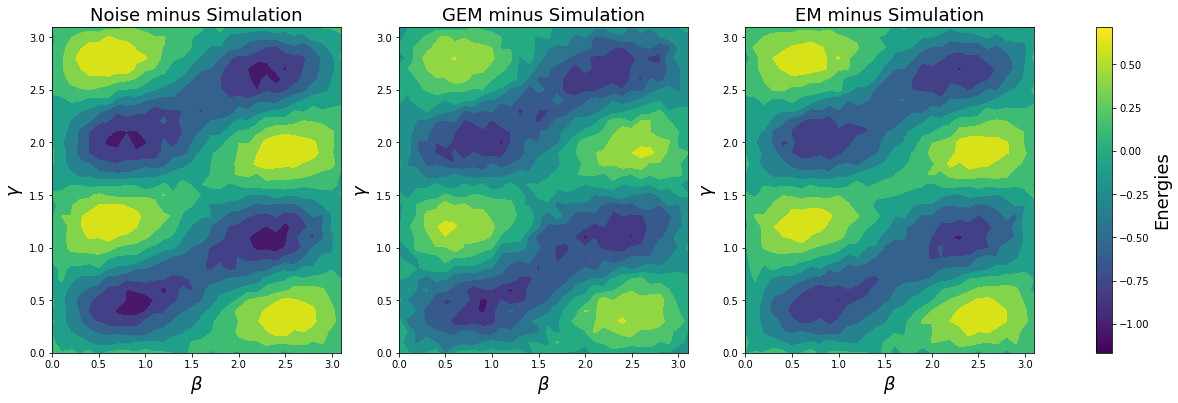

In [347]:
from matplotlib.colors import Normalize
import matplotlib.cm as cm
import numpy as np
from matplotlib.colors import Normalize
import matplotlib.pyplot as plt
import matplotlib.cm as cm

fig, ax = plt.subplots(1,3, figsize=(22,6))
#fig.set_size_inches(10, 8)
# simulation
cmap = cm.get_cmap('viridis'
#normalizer=Normalize(0,4)
#im=cm.ScalarMappable(norm=normalizer)
minv = np.min([diff_landscape, diff_gem_landscape, diff_em_landscape])
maxv = np.max([diff_landscape, diff_gem_landscape, diff_em_landscape])
normalizer=Normalize(minv,maxv)
im=cm.ScalarMappable(norm=normalizer)

# diffrenz: noise - sim  
plot = ax[0].contourf(gamma_range, beta_range, diff_landscape, cmap = cmap)
ax[0].set_xlabel(r'$\beta$', fontsize = 18)
ax[0].set_ylabel(r'$\gamma$', fontsize = 18)
#colorbar = plt.colorbar(plot)
#colorbar = plt.colorbar(im, ax=ax[0])
#colorbar.ax.set_ylabel('Energies', fontsize = 18)

ax[0].set_title('Noise minus Simulation', fontsize = 18)

# diffrenz: gem - sim  
plot = ax[1].contourf(gamma_range, beta_range, diff_gem_landscape, cmap = cmap)
ax[1].set_xlabel(r'$\beta$', fontsize = 18)
ax[1].set_ylabel(r'$\gamma$', fontsize = 18)
#colorbar = plt.colorbar(plot)
#colorbar = plt.colorbar(im, ax=ax[1])
#colorbar.ax.set_ylabel('Energies', fontsize = 18)

ax[1].set_title('GEM minus Simulation', fontsize = 18)

# diffrenz: gem - noise  
plot = ax[2].contourf(gamma_range, beta_range, diff_em_landscape, cmap = cmap)
ax[2].set_xlabel(r'$\beta$', fontsize = 18)
ax[2].set_ylabel(r'$\gamma$', fontsize = 18)
#colorbar = plt.colorbar(plot)
colorbar = plt.colorbar(im, ax=ax)
colorbar.ax.set_ylabel('Energies', fontsize = 18)

ax[2].set_title('EM minus Simulation', fontsize = 18)


TypeError: 'AxesSubplot' object is not subscriptable

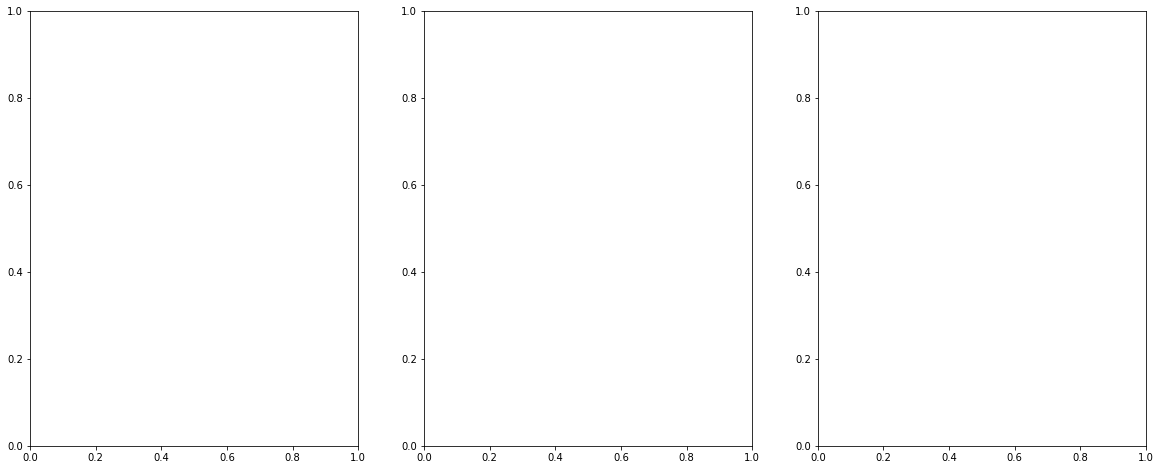

In [336]:
from matplotlib.colors import Normalize
import matplotlib.cm as cm
import numpy as np
from matplotlib.colors import Normalize
import matplotlib.pyplot as plt
import matplotlib.cm as cm

fig, ax = plt.subplots(1,3, figsize=(20,8))
#fig.set_size_inches(10, 8)
# simulation
cmap = cm.get_cmap('viridis')
#normalizer=Normalize(0,4)
#im=cm.ScalarMappable(norm=normalizer)
minv = np.min([landscape, noise_landscape, gem_landscape])
maxv = np.max([landscape, noise_landscape, gem_landscape])
normalizer=Normalize(minv,maxv)
im=cm.ScalarMappable(norm=normalizer)

plot = ax[0][0].contourf(gamma_range, beta_range, landscape, cmap = cmap, norm=normalizer)
ax[0][0].set_xlabel(r'$\beta$', fontsize = 18)
ax[0][0].set_ylabel(r'$\gamma$', fontsize = 18)
colorbar = plt.colorbar(im, ax=ax[0][0])
colorbar.ax.set_ylabel('Energies', fontsize = 18)
ax[0][0].set_title('Simulation')

# noise 
plot = ax[0][1].contourf(gamma_range, beta_range, noise_landscape, cmap = cmap, norm=normalizer)
ax[0][1].set_xlabel(r'$\beta$', fontsize = 18)
ax[0][1].set_ylabel(r'$\gamma$', fontsize = 18)

colorbar = plt.colorbar(im, ax=ax[0][1])
colorbar.ax.set_ylabel('Energies', fontsize = 18)
ax[0][1].set_title('Noise')

# gem 
plot = ax[0][2].contourf(gamma_range, beta_range, gem_landscape, cmap = cmap, norm=normalizer)
ax[0][2].set_xlabel(r'$\beta$', fontsize = 18)
ax[0][2].set_ylabel(r'$\gamma$', fontsize = 18)
#colorbar = plt.colorbar(plot)
colorbar = plt.colorbar(im, ax=ax[0][2])
colorbar.ax.set_ylabel('Energies', fontsize = 18)

ax[0][2].set_title('Noise mit GEM')

# diffrenz: noise - sim  
plot = ax[1][0].contourf(gamma_range, beta_range, diff_landscape, cmap = cmap)
ax[1][0].set_xlabel(r'$\beta$', fontsize = 18)
ax[1][0].set_ylabel(r'$\gamma$', fontsize = 18)
#colorbar = plt.colorbar(plot)
#colorbar = plt.colorbar(plot, ax=ax[1][0])
#colorbar.ax.set_ylabel('Energies', fontsize = 18)

ax[1][0].set_title('Noise minus Simulation')

# diffrenz: gem - sim  
plot = ax[1][1].contourf(gamma_range, beta_range, diff_gem_landscape, cmap = cmap)
ax[1][1].set_xlabel(r'$\beta$', fontsize = 18)
ax[1][1].set_ylabel(r'$\gamma$', fontsize = 18)
#colorbar = plt.colorbar(plot)
#colorbar = plt.colorbar(plot, ax=ax[1][1])
#colorbar.ax.set_ylabel('Energies', fontsize = 18)

ax[1][1].set_title('GEM minus Simulation')

# diffrenz: gem - noise  
plot = ax[1][2].contourf(gamma_range, beta_range, (noise_landscape - gem_landscape), cmap = cmap)
ax[1][2].set_xlabel(r'$\beta$', fontsize = 18)
ax[1][2].set_ylabel(r'$\gamma$', fontsize = 18)
#colorbar = plt.colorbar(plot)
colorbar = plt.colorbar(plot, ax=ax[1][2])
colorbar.ax.set_ylabel('Energies', fontsize = 18)

ax[1][2].set_title('Noise minus GEM')

#plt.colorbar(plot, ax=ax[1][2])
